<a href="https://colab.research.google.com/github/Amruthavalli-k/PowerOpt/blob/main/PowerOpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
num_samples = 1000

# Define distributions for features
data = {
    "Machine Type": np.random.choice(["Molding", "Assembly", "Packaging"], size=num_samples, p=[0.4, 0.3, 0.3]),
    "Power Rating (kW)": np.random.uniform(10, 50, size=num_samples),  # Uniform distribution for power ratings
    "Utilization Rate (%)": np.random.uniform(30, 100, size=num_samples),  # Utilization rates between 30% and 100%
    "Production Volume": np.random.randint(100, 5000, size=num_samples),  # Random production volume
    "Batch Size": np.random.randint(50, 500, size=num_samples),  # Random batch size
    "Shift Timing": np.random.choice(["Day", "Evening", "Night"], size=num_samples, p=[0.4, 0.3, 0.3]),
    "Ambient Temperature (°C)": np.random.normal(25, 5, size=num_samples),  # Normal distribution for temperature
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Introduce dependencies
# Adjust power rating based on machine type
df["Power Rating (kW)"] = np.where(
    df["Machine Type"] == "Molding",
    df["Power Rating (kW)"] * 1.2,  # Molding machines consume more power
    df["Power Rating (kW)"]
)

# Add production time (minutes) based on batch size and machine type
df["Production Time (min)"] = np.where(
    df["Machine Type"] == "Molding",
    df["Batch Size"] * np.random.uniform(1.5, 2.5, size=num_samples),  # Molding is slower
    np.where(
        df["Machine Type"] == "Assembly",
        df["Batch Size"] * np.random.uniform(1.0, 1.5, size=num_samples),
        df["Batch Size"] * np.random.uniform(0.8, 1.2, size=num_samples)  # Packaging is faster
    )
)

# Calculate energy consumption (kWh) as a function of power, utilization, and production time
df["Energy Consumption (kWh)"] = (
    df["Power Rating (kW)"]
    * (df["Utilization Rate (%)"] / 100)
    * (df["Production Time (min)"] / 60)  # Convert minutes to hours
)

# Add a noise factor to simulate real-world variability
df["Energy Consumption (kWh)"] += np.random.normal(0, 5, size=num_samples)  # Small random noise

# Display the first few rows of the synthetic dataset
print(df.tail())

# Save to CSV (optional)
df.to_csv("synthetic_energy_data.csv", index=False)



      Machine Type  Power Rating (kW)  Utilization Rate (%)  \
14995     Assembly          48.091018             43.539284   
14996      Molding          47.895562             52.361605   
14997      Molding          12.933881             54.738559   
14998     Assembly          26.040194             50.077543   
14999      Molding          24.355103             89.727066   

       Production Volume  Batch Size Shift Timing  Ambient Temperature (°C)  \
14995               4670         128          Day                 29.792831   
14996               1609         269      Evening                 20.950830   
14997                252         454        Night                 24.283746   
14998                653         136          Day                 30.783242   
14999               4682         378          Day                 22.546166   

       Production Time (min)  Energy Consumption (kWh)  
14995             185.231934                 72.284312  
14996             522.322407    

In [ ]:
df = pd.read_csv('synthetic_energy_data.csv')
df.shape

(15000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Machine Type              15000 non-null  object 
 1   Power Rating (kW)         15000 non-null  float64
 2   Utilization Rate (%)      15000 non-null  float64
 3   Production Volume         15000 non-null  int64  
 4   Batch Size                15000 non-null  int64  
 5   Shift Timing              15000 non-null  object 
 6   Ambient Temperature (°C)  15000 non-null  float64
 7   Production Time (min)     15000 non-null  float64
 8   Energy Consumption (kWh)  15000 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 1.0+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

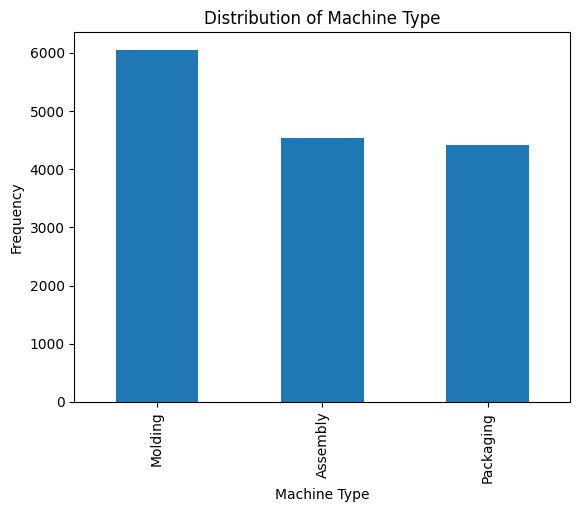

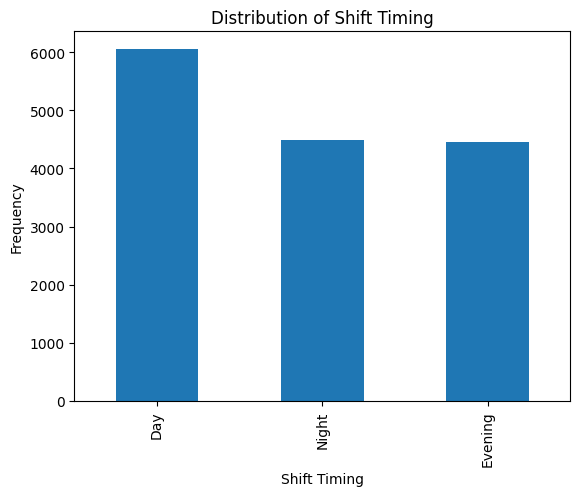

In [ ]:
# Univariate Analysis for Categorical Data
categorical_cols = ['Machine Type', 'Shift Timing']
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
    plt.show()

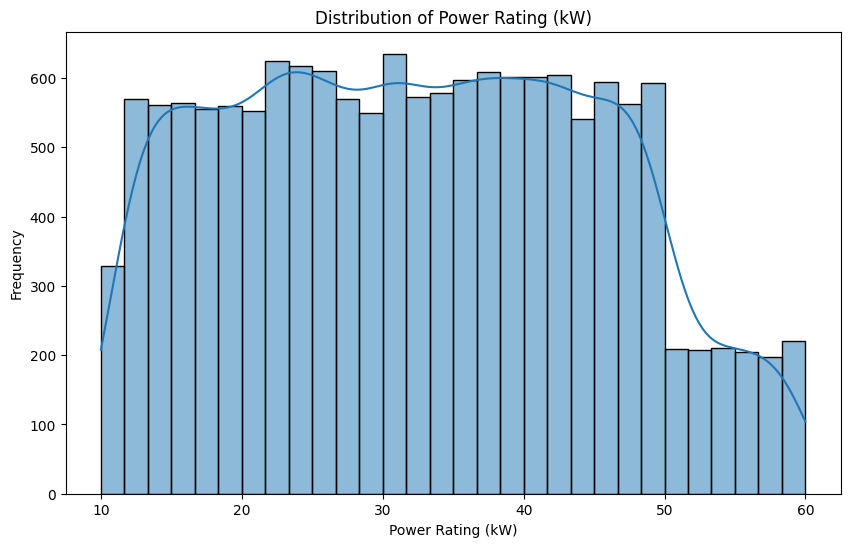

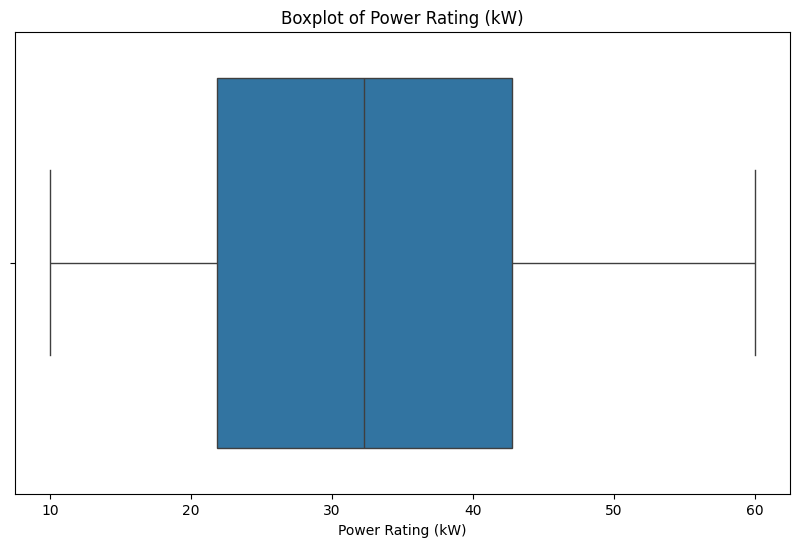

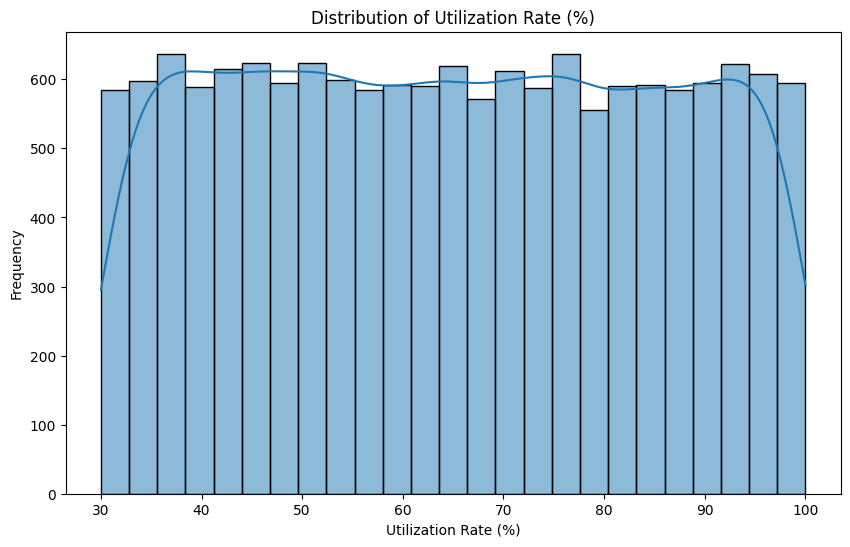

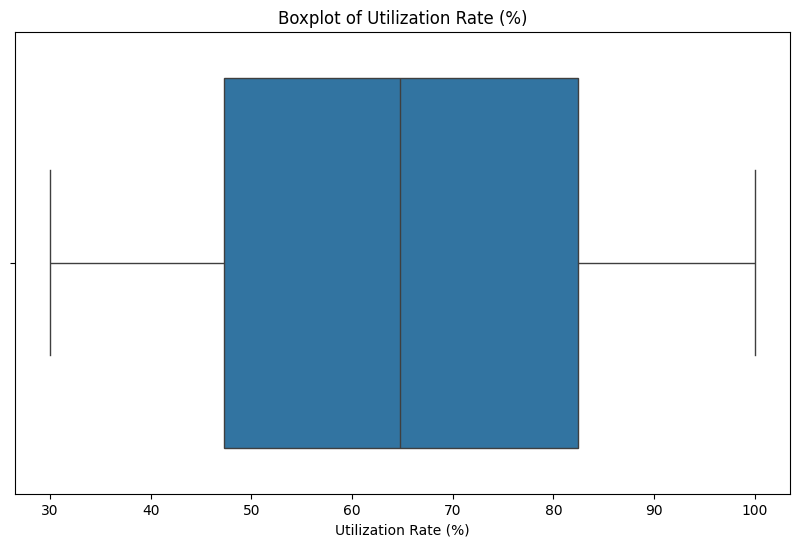

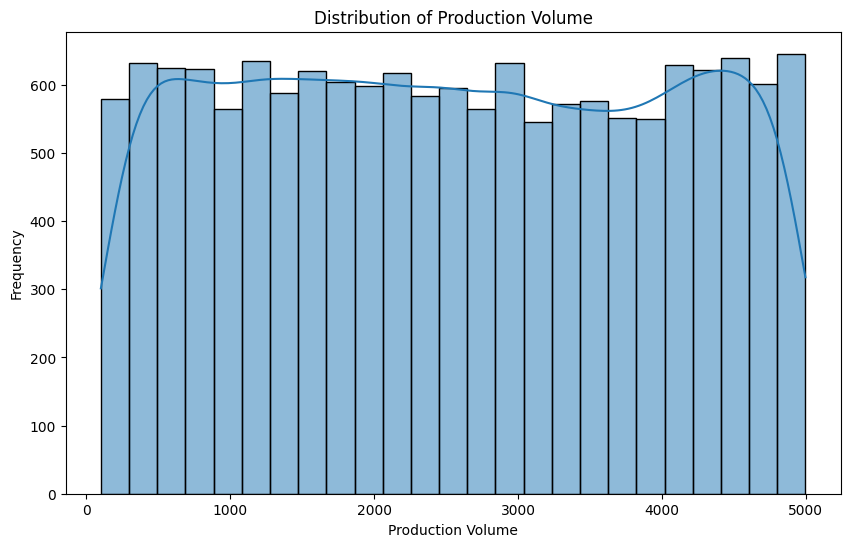

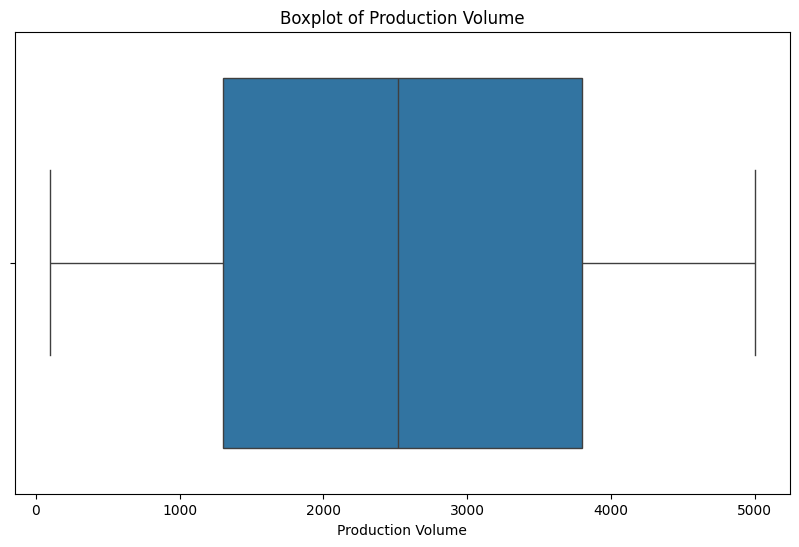

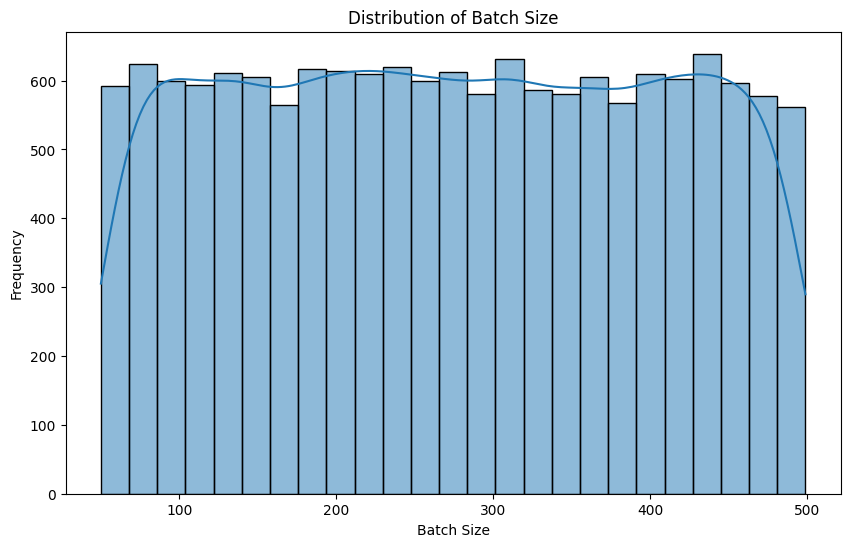

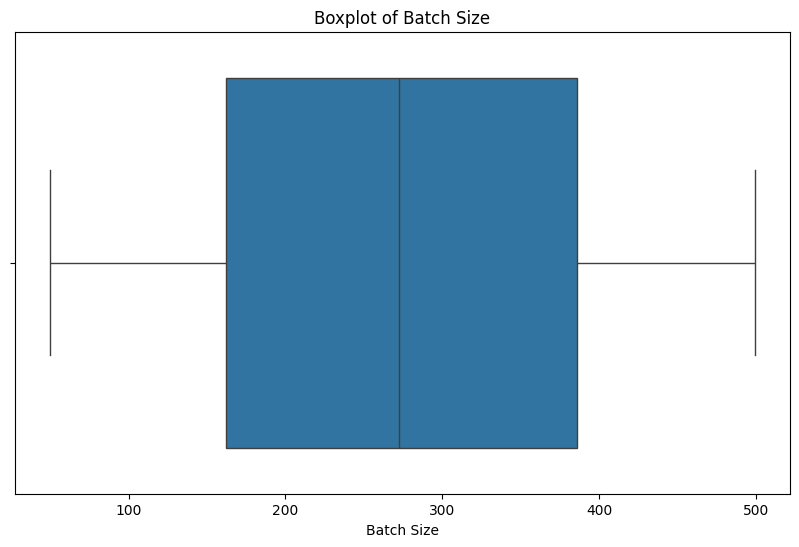

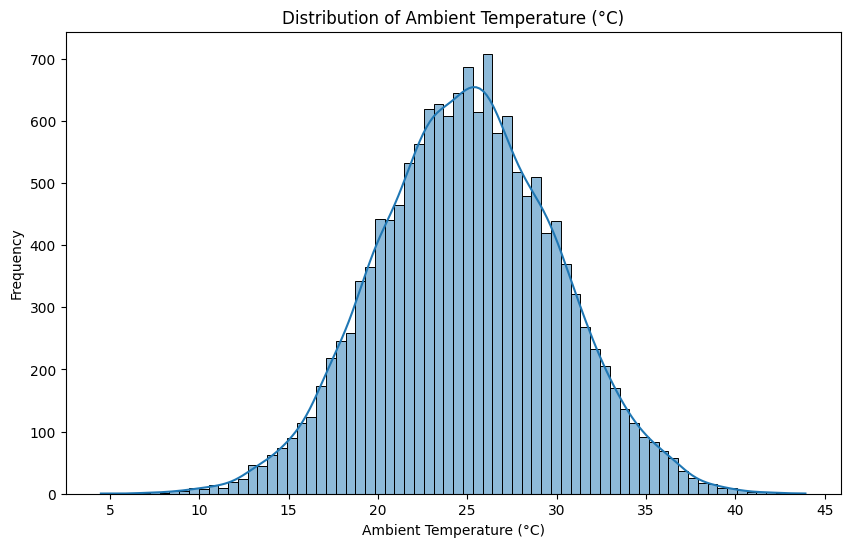

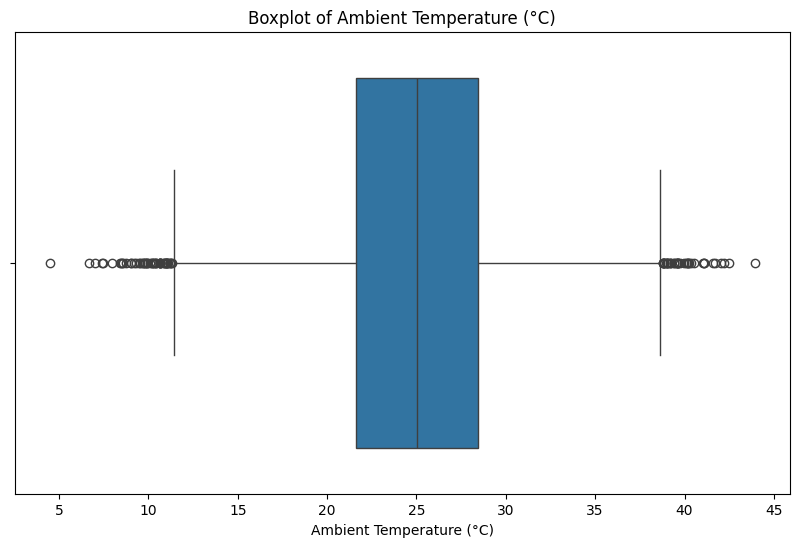

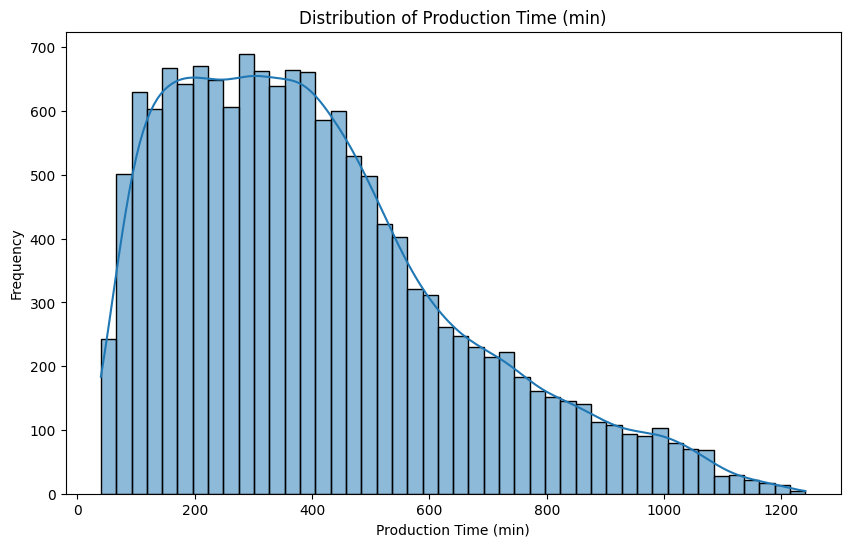

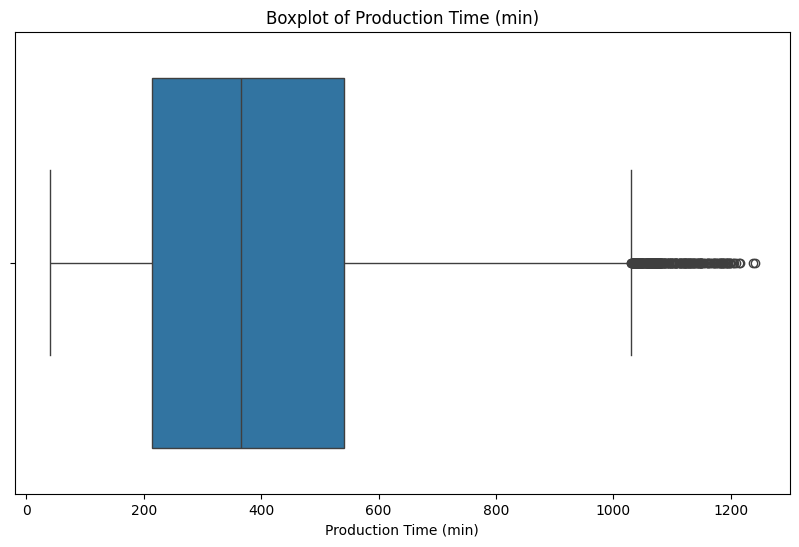

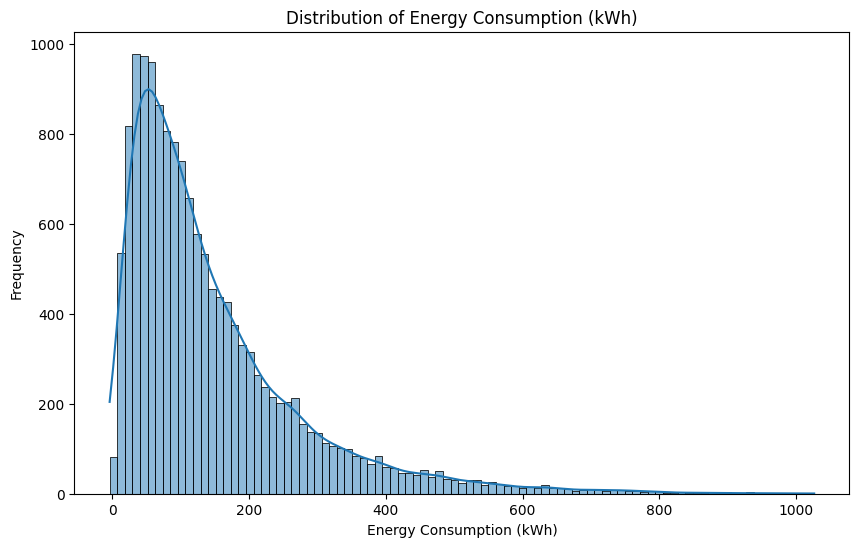

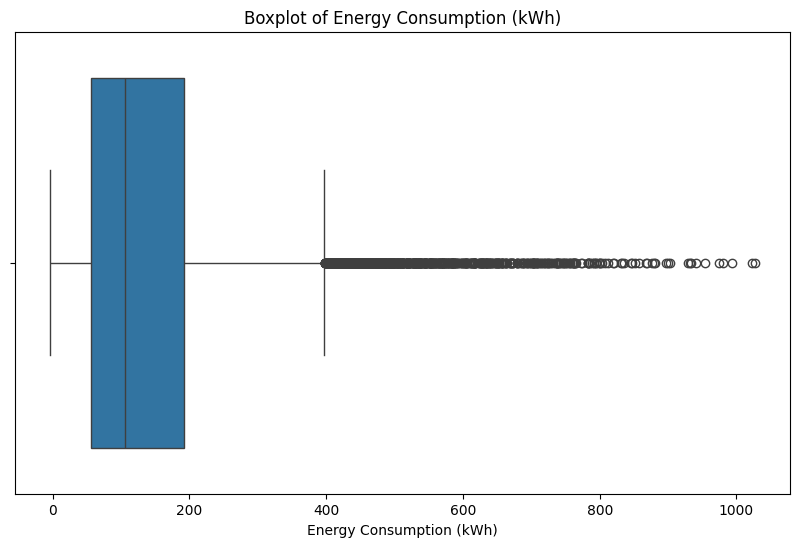

In [ ]:
# Univariate Analysis for Continuous Data
continuous_cols = ['Power Rating (kW)', 'Utilization Rate (%)', 'Production Volume',
                   'Batch Size', 'Ambient Temperature (°C)',
                   'Production Time (min)', 'Energy Consumption (kWh)']

for col in continuous_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Pairplot of numerical variables:


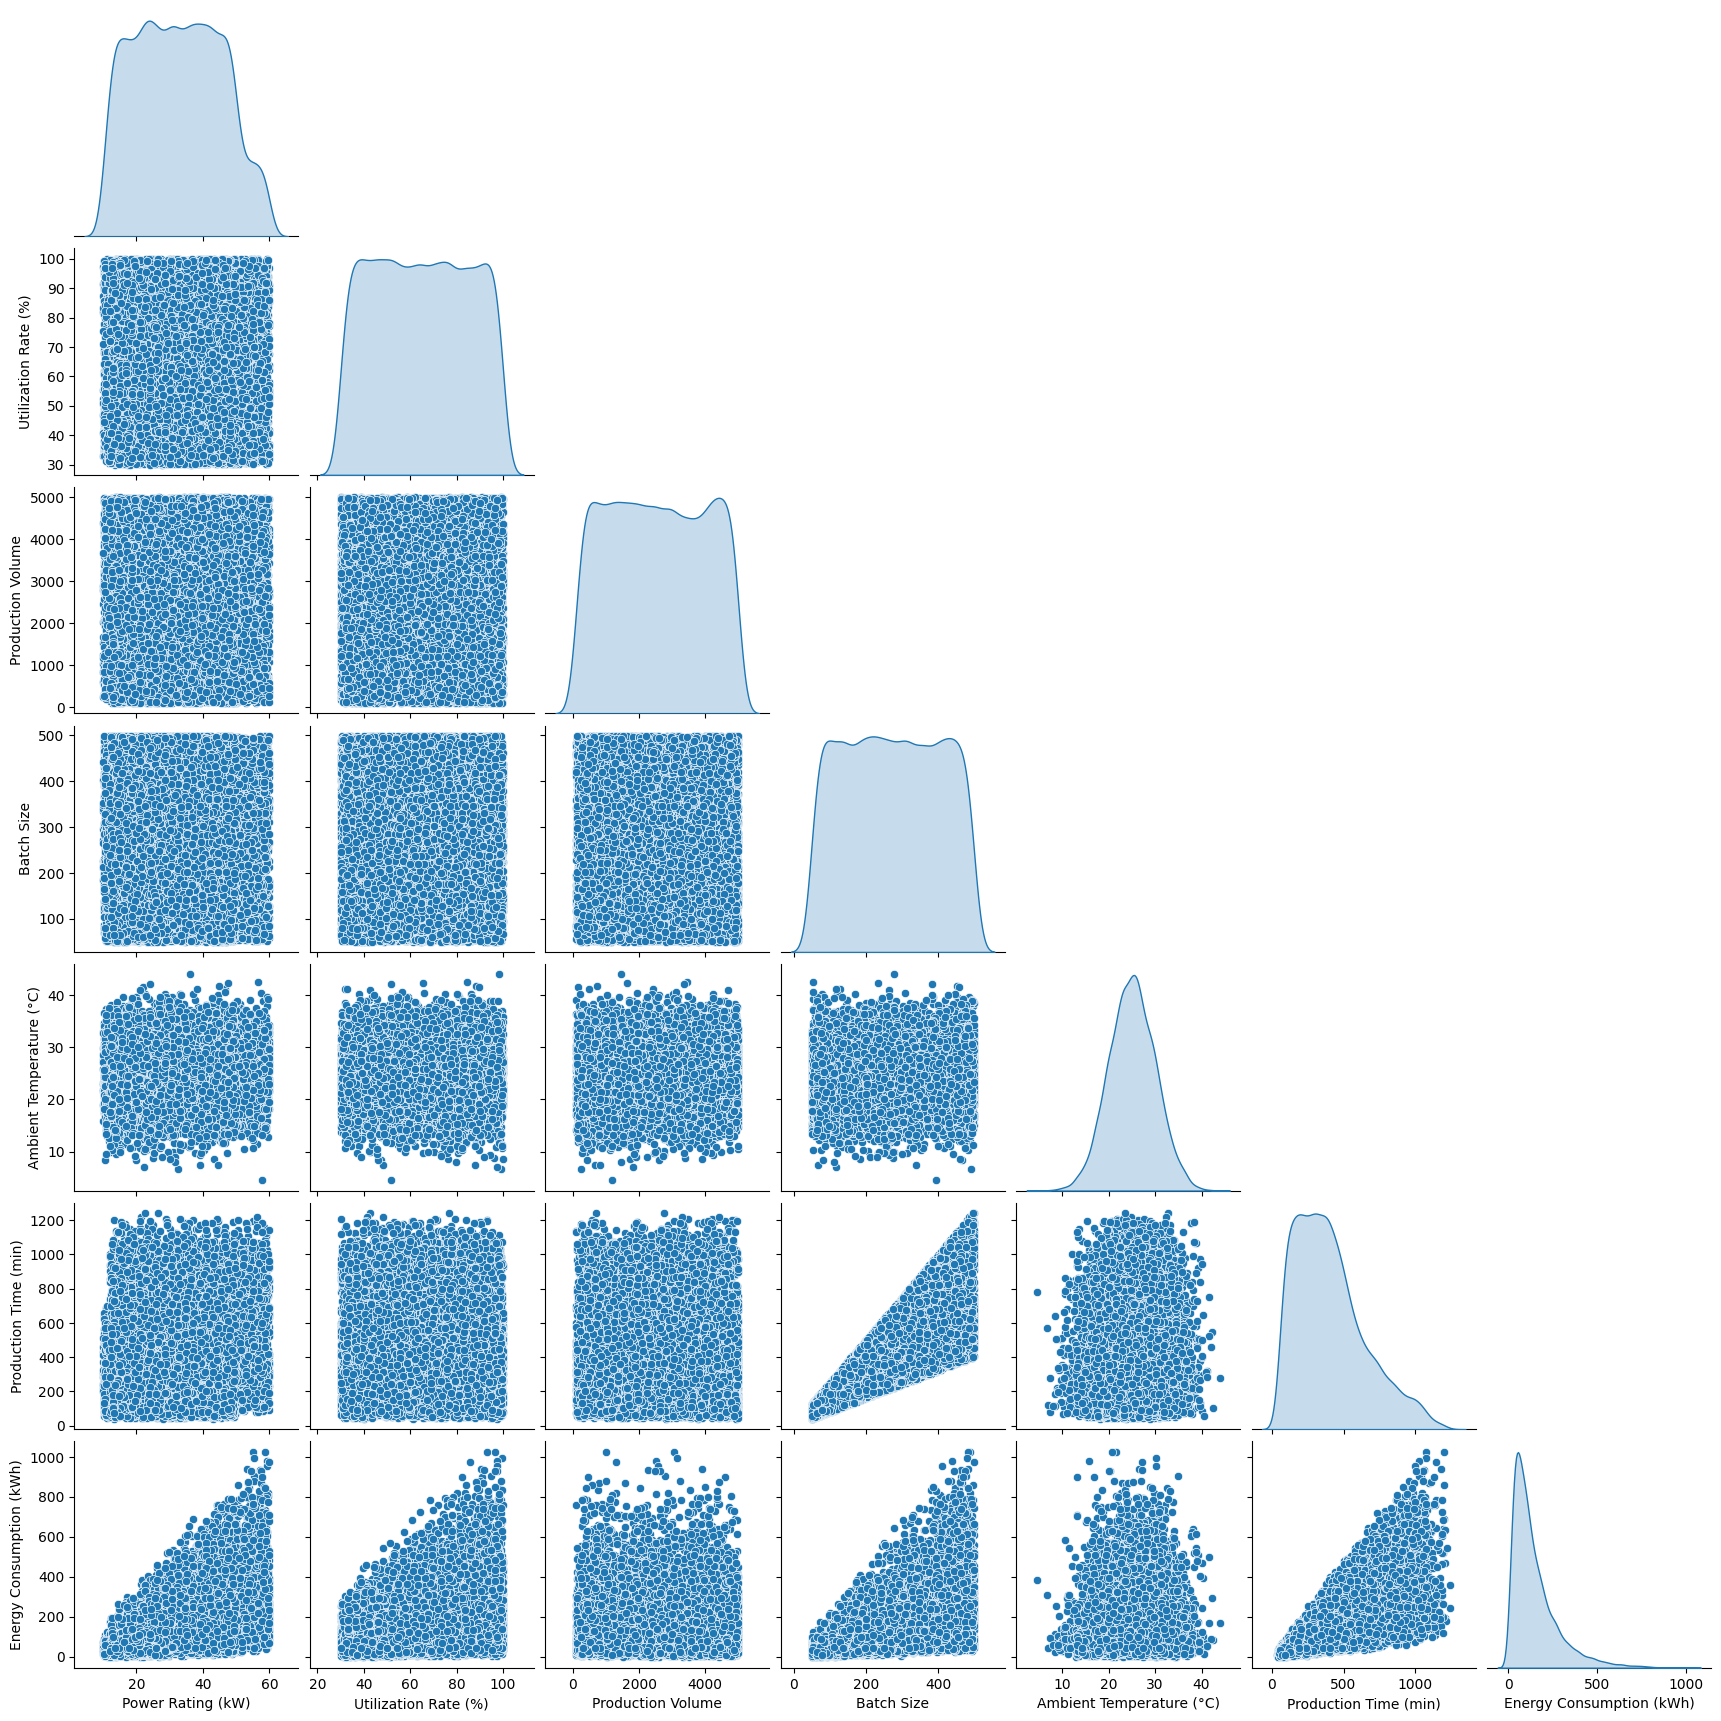

In [ ]:
# Pairplot to visualize pairwise relationships
print("Pairplot of numerical variables:")
sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()

Scatter plots between independent variables and the dependent variable:


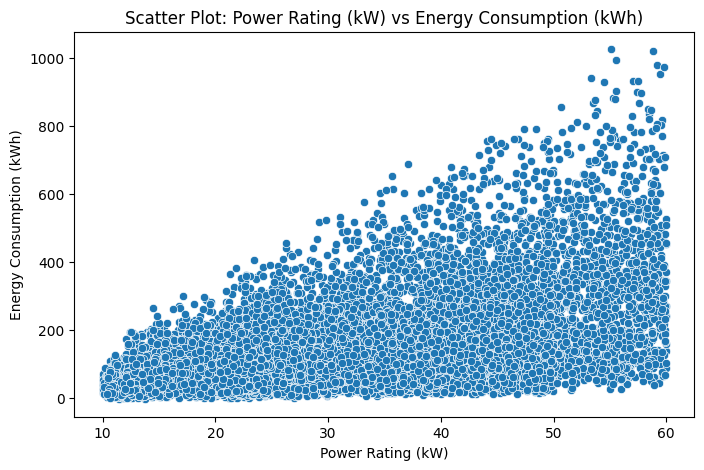

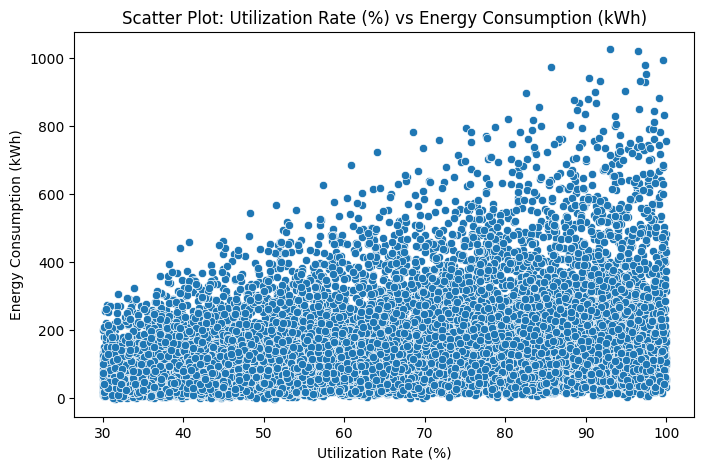

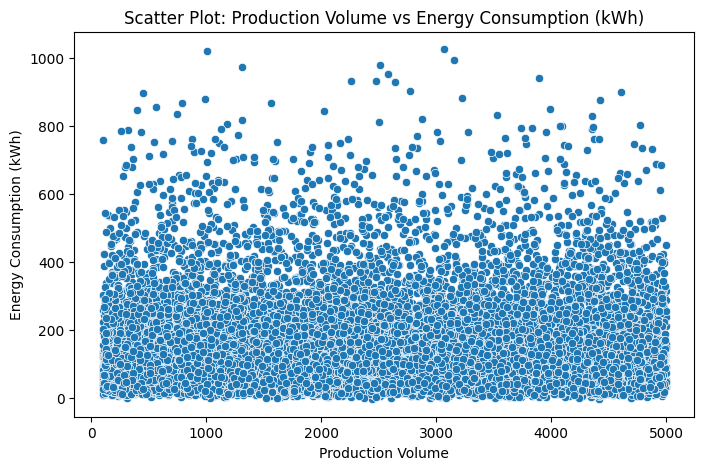

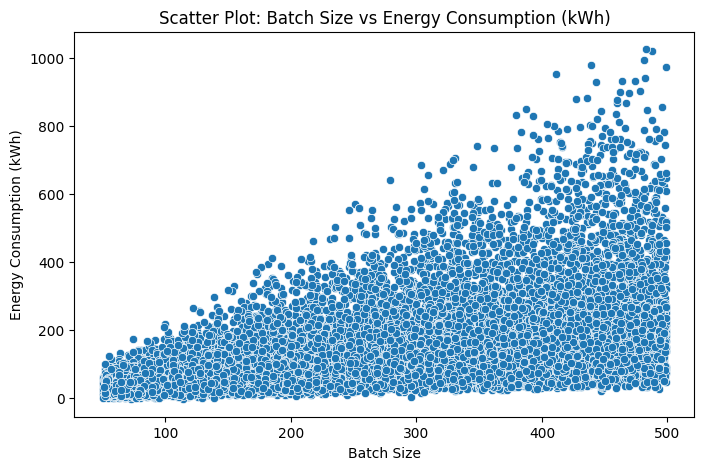

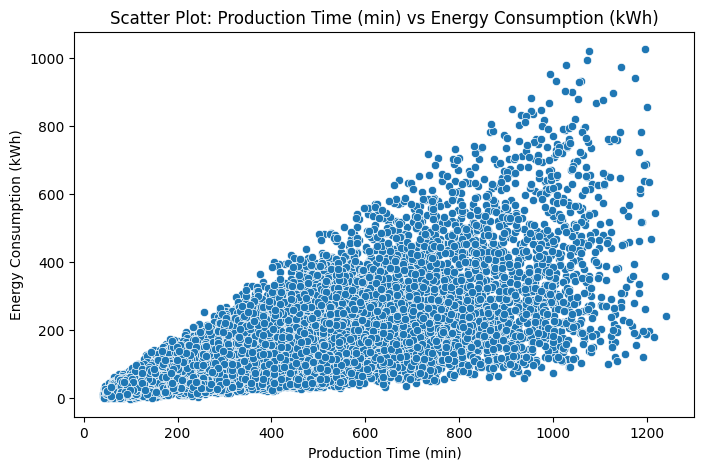

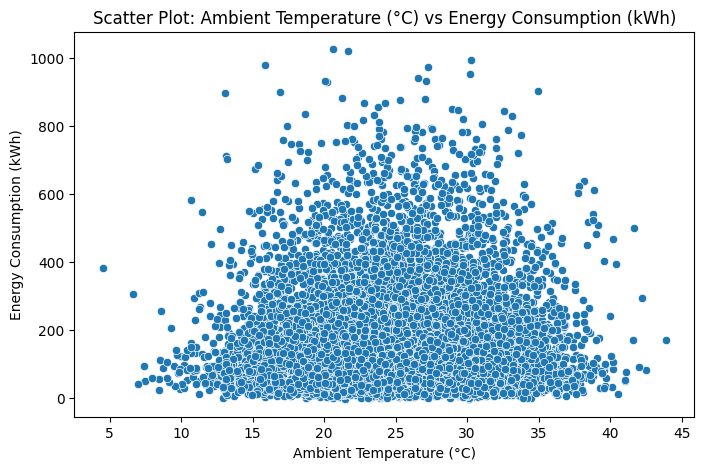

In [ ]:
# Scatter plot between independent variables and the dependent variable
print("Scatter plots between independent variables and the dependent variable:")
independent_vars = ['Power Rating (kW)', 'Utilization Rate (%)', 'Production Volume',
                    'Batch Size', 'Production Time (min)', 'Ambient Temperature (°C)']
dependent_var = 'Energy Consumption (kWh)'

for col in independent_vars:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[col], y=df[dependent_var])
    plt.title(f'Scatter Plot: {col} vs {dependent_var}')
    plt.xlabel(col)
    plt.ylabel(dependent_var)
    plt.show()

Boxplots for categorical variables vs Energy Consumption:


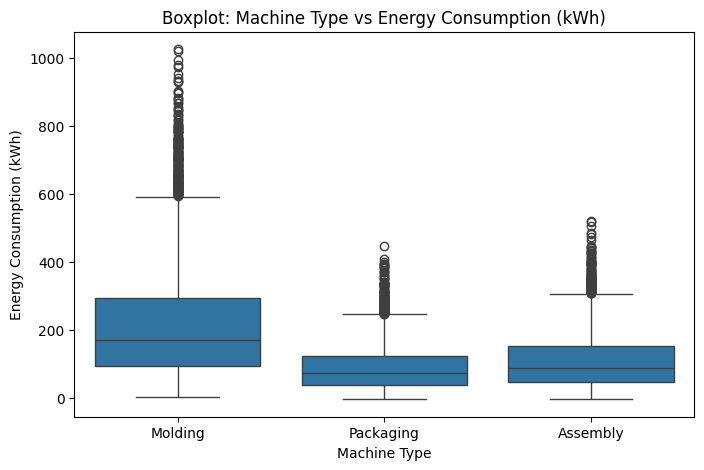

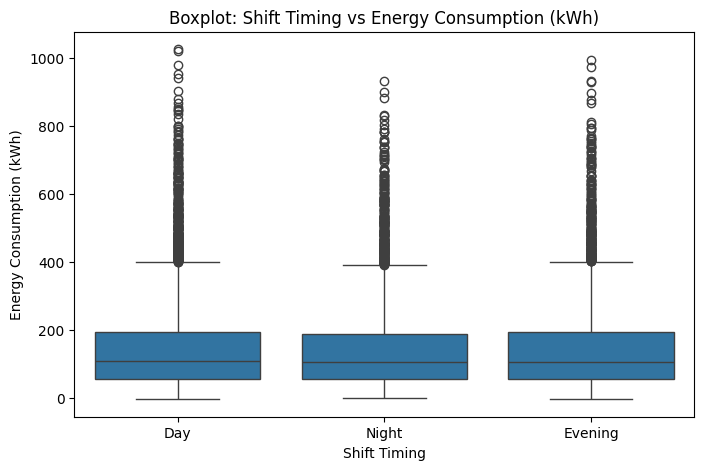

In [ ]:
# Boxplot for categorical variables vs dependent variable
categorical_vars = ['Machine Type', 'Shift Timing']

print("Boxplots for categorical variables vs Energy Consumption:")
for cat_col in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[cat_col], y=df[dependent_var])
    plt.title(f'Boxplot: {cat_col} vs {dependent_var}')
    plt.xlabel(cat_col)
    plt.ylabel(dependent_var)
    plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=['number'])
print(numeric_cols)

       Power Rating (kW)  Utilization Rate (%)  Production Volume  Batch Size  \
0              35.984172             74.670120               1322         340   
1              39.869871             62.150472               4631         128   
2              32.506671             97.514897               2364         108   
3              13.332103             45.328492               1633         166   
4              20.907851             71.149949               4893         298   
...                  ...                   ...                ...         ...   
14995          48.091018             43.539284               4670         128   
14996          47.895562             52.361605               1609         269   
14997          12.933881             54.738559                252         454   
14998          26.040194             50.077543                653         136   
14999          24.355103             89.727066               4682         378   

       Ambient Temperature 

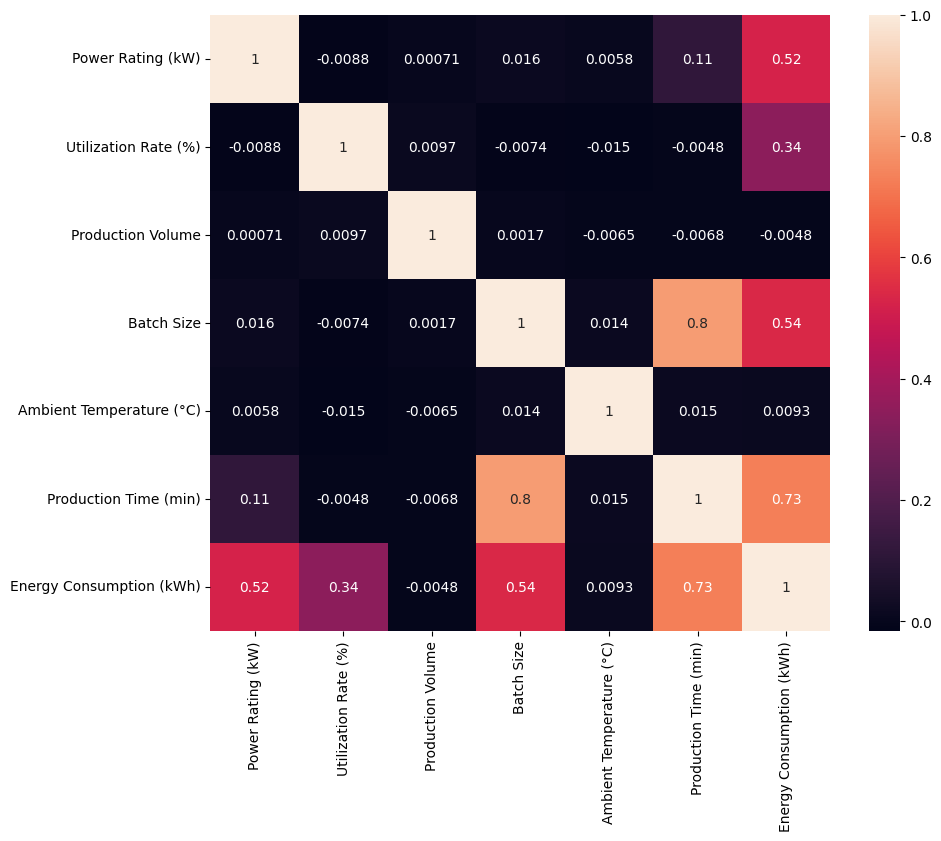

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True)
plt.show()